In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [2]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)

def phi(E):
    return(2*(1.27*m*L)/E)

m=6.9*10**-5 #delta m_square
L=180
E=arange(2*10**-3,12*10**-3,10**-3)
th=pi/2 # 2*mixing angle

In [3]:
backend=BasicAer.get_backend('qasm_simulator')
app_counts=[]
dis_counts=[]
Phi=phi(E)

for phi in Phi:
    qc.u(th,0,0,qr[0])
    qc.u(0,0,phi,qr[0])
    qc.u(-1*th,0,0,qr[0])
    qc.measure(qr[0],cr[0])
    job=execute(qc,backend=backend,shots=1024).result().get_counts()
    if '0' in job:
            app_counts.append(job['0']/1024)
            dis_counts.append((1024-job['0'])/1024)
    else:
        app_counts.append(0)
        dis_counts.append(1)
    qc.reset(qr[0])


In [4]:
E2=arange(2*10**-3,12*10**-3,10**-4)
def true_function(E):
    p= 1-(1*(sin(1.27*m*L/E))**2)#appearance probability
    return(p)
Th_curve=true_function(E2)

plot(E2,Th_curve,label='theoretical')
plot(E,app_counts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P ee')
legend()

In [5]:
qr2=QuantumRegister(1)
cr2=ClassicalRegister(1)
qc2=QuantumCircuit(qr2,cr2)

def phi(E):
    return(2*(1.27*m*L)/E)

m=6.9*10**-5 #delta m_square
L=180
E3=arange(2*10**-3,12*10**-3,0.5*10**-3)
th=pi/2 # 2*mixing angle

In [6]:
backend=BasicAer.get_backend('qasm_simulator')
app_counts2=[]
dis_counts2=[]
Phi2=phi(E3)

for phi in Phi2:
    qc2.u(th,0,0,qr2[0])
    qc2.u(0,0,phi,qr2[0])
    qc2.u(-1*th,0,0,qr2[0])
    qc2.measure(qr2[0],cr2[0])
    job=execute(qc2,backend=backend,shots=1024).result().get_counts()
    if '0' in job:
            app_counts2.append(job['0']/1024)
            dis_counts2.append((1024-job['0'])/1024)
    else:
        app_counts2.append(0)
        dis_counts2.append(1)
    qc2.reset(qr2[0])


In [7]:
AC=true_function(E3)
yerr1=[p-q for p,q in zip(app_counts2,AC)]

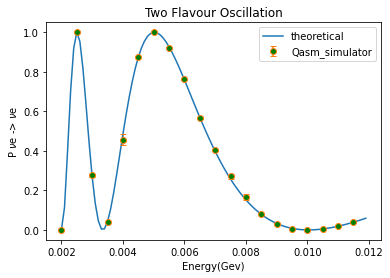

In [8]:
plot(E2,Th_curve,label='theoretical')
errorbar(E3,app_counts2,yerr1,fmt='o',mfc='green',capsize=3,label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P $\\nu$e -> $\\nu$e')
legend()
#savefig('tfo_kamland.pdf')

#Quantum Computer simulated data
'''
ibm_belem
Quantum Volume=16
Avg. CNOT Error: 1.072e-2
Avg. Readout Error: 9.904e-2
Avg. T1: 82.11 us
Avg. T2: 106.1 us
'''

appearance_counts=[0.1943359375, 0.669921875, 0.4248046875, 0.337890625, 0.49609375,0.7158203125,
                   0.6982421875, 0.6689453125, 0.634765625, 0.5537109375,0.4384765625, 0.3994140625,
                   0.392578125, 0.3447265625, 0.341796875,0.1904296875, 0.330078125, 0.306640625, 0.32421875, 
                   0.3349609375]
disappearance_counts=[0.8056640625, 0.330078125, 0.5751953125, 0.662109375, 0.50390625,
                     0.2841796875, 0.3017578125, 0.3310546875, 0.365234375, 0.4462890625,
                     0.5615234375, 0.6005859375, 0.607421875, 0.6552734375, 0.658203125,
                     0.8095703125, 0.669921875, 0.693359375, 0.67578125, 0.6650390625]

plot(E2,Th_curve,label='theoretical')
plot(E3,app_counts2,'o',label='Qasm_simulator')
plot(E3,appearance_counts,'o',label='ibm_belem')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P ee')
legend()

In [9]:
appearance_counts= [0.0751953125, 0.9296875, 0.31640625, 0.1005859375, 0.46875, 0.8330078125, 0.93359375, 0.8759765625, 0.7294921875, 0.576171875, 0.4013671875, 0.3134765625, 0.228515625, 0.1513671875, 0.08984375, 0.09375, 0.080078125, 0.0830078125, 0.0947265625, 0.1318359375]


'''[0.208984375,0.8095703125,0.41015625,0.216796875,0.45703125,0.7314453125,0.8349609375,
                   0.7890625,0.66015625,0.541015625,0.4423828125,0.375,0.29199921875,0.2626953125,0.21484375,0.1982428175,
                  0.19921875,0.1962890625,0.193359375,0.20703125]'''
disappearance_counts=[]

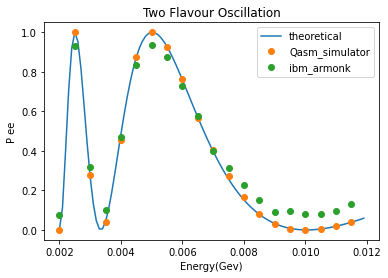

In [10]:
plot(E2,Th_curve,label='theoretical')
plot(E3,app_counts2,'o',label='Qasm_simulator')
plot(E3,appearance_counts,'o',label='ibm_armonk')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P ee')
legend()

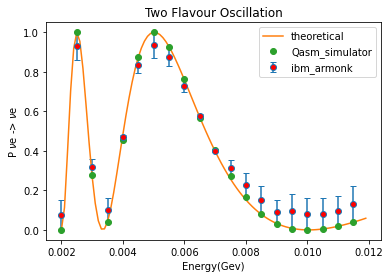

In [11]:
yerr=[p-q for p,q in zip(app_counts2,appearance_counts)]
errorbar(E3,appearance_counts,yerr,fmt='o',mfc='red',capsize=3,label='ibm_armonk')
plot(E2,Th_curve,label='theoretical')
plot(E3,app_counts2,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P $\\nu$e -> $\\nu$e')

legend()
#savefig('TFO_KAM_armonk.pdf')

In [12]:
appearnce= [0.1044921875, 0.91015625, 0.31640625, 0.126953125, 0.5185546875, 0.8076171875, 0.9111328125, 0.8408203125, 0.7119140625, 0.552734375, 0.3916015625, 0.3017578125, 0.2197265625, 0.1669921875, 0.12890625, 0.1064453125, 0.083984375, 0.103515625, 0.1201171875, 0.125]

In [13]:
yerr=[p-q for p,q in zip(app_counts2,appearance)]
errorbar(E3,appearance,yerr,fmt='o',mfc='red',capsize=3,label='ibmqx2')
plot(E2,Th_curve,label='theoretical')
plot(E3,app_counts2,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P $\\nu$e -> $\\nu$e')
legend()
#savefig('TFO_KAM_armonk.pdf')

NameError: name 'appearance' is not defined